
# **Travail sur les données chimiques de vins**




Question 1 : Comment prédire la quantité d'alcool, en fonction des données à notre disposition, hors la qualité qui ne semble pas être une mesure ?


Quelques rappels sur les taches à effectuer avant modélisation :
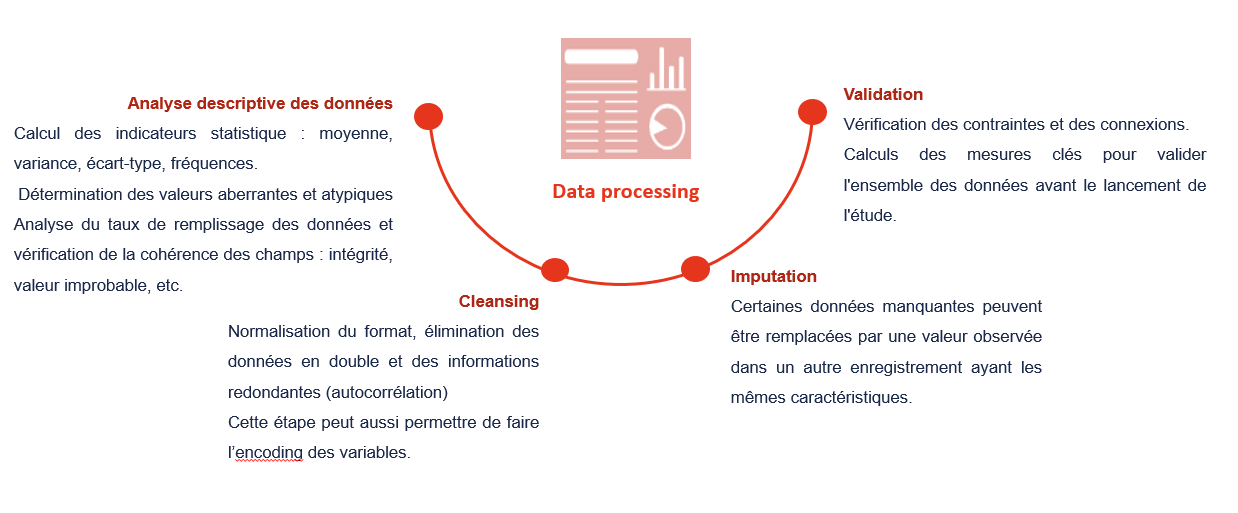

In [17]:
#Import des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
#Import des données
data = pd.read_csv("winequality-white (1).csv", sep = ";", encoding="utf-8")


In [19]:
#Stats desc basiques
display(data, data.describe(), data.info(), data.dtypes,data.duplicated().value_counts())

'''
Cette première analyse nous permet de voir :
- nous avons 4898 lignes
- les variables sont quanti (good)
- on va avoir des problème d'ordre de grandeur a gérer (donc std/norm/autre à faire)
- il y a 937 ligne en doublons total (à voir ce que nous en faisons car 1/5 du dataset)
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


None

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

False    3961
True      937
dtype: int64

"\nCette première analyse nous permet de voir :\n- nous avons 4898 lignes\n- les variables sont quanti (good)\n- on va avoir des problème d'ordre de grandeur a gérer (donc std/norm/autre à faire)\n- il y a 937 ligne en doublons total (à voir ce que nous en faisons car 1/5 du dataset)\n"

" \nNous devons partir sur une étude de corrélation plus approfondie sur quelques variables\nLes distributions semblent normales à l'oeil (sauf residual sugar..), ce qui nous suffira pour ce TP\n"

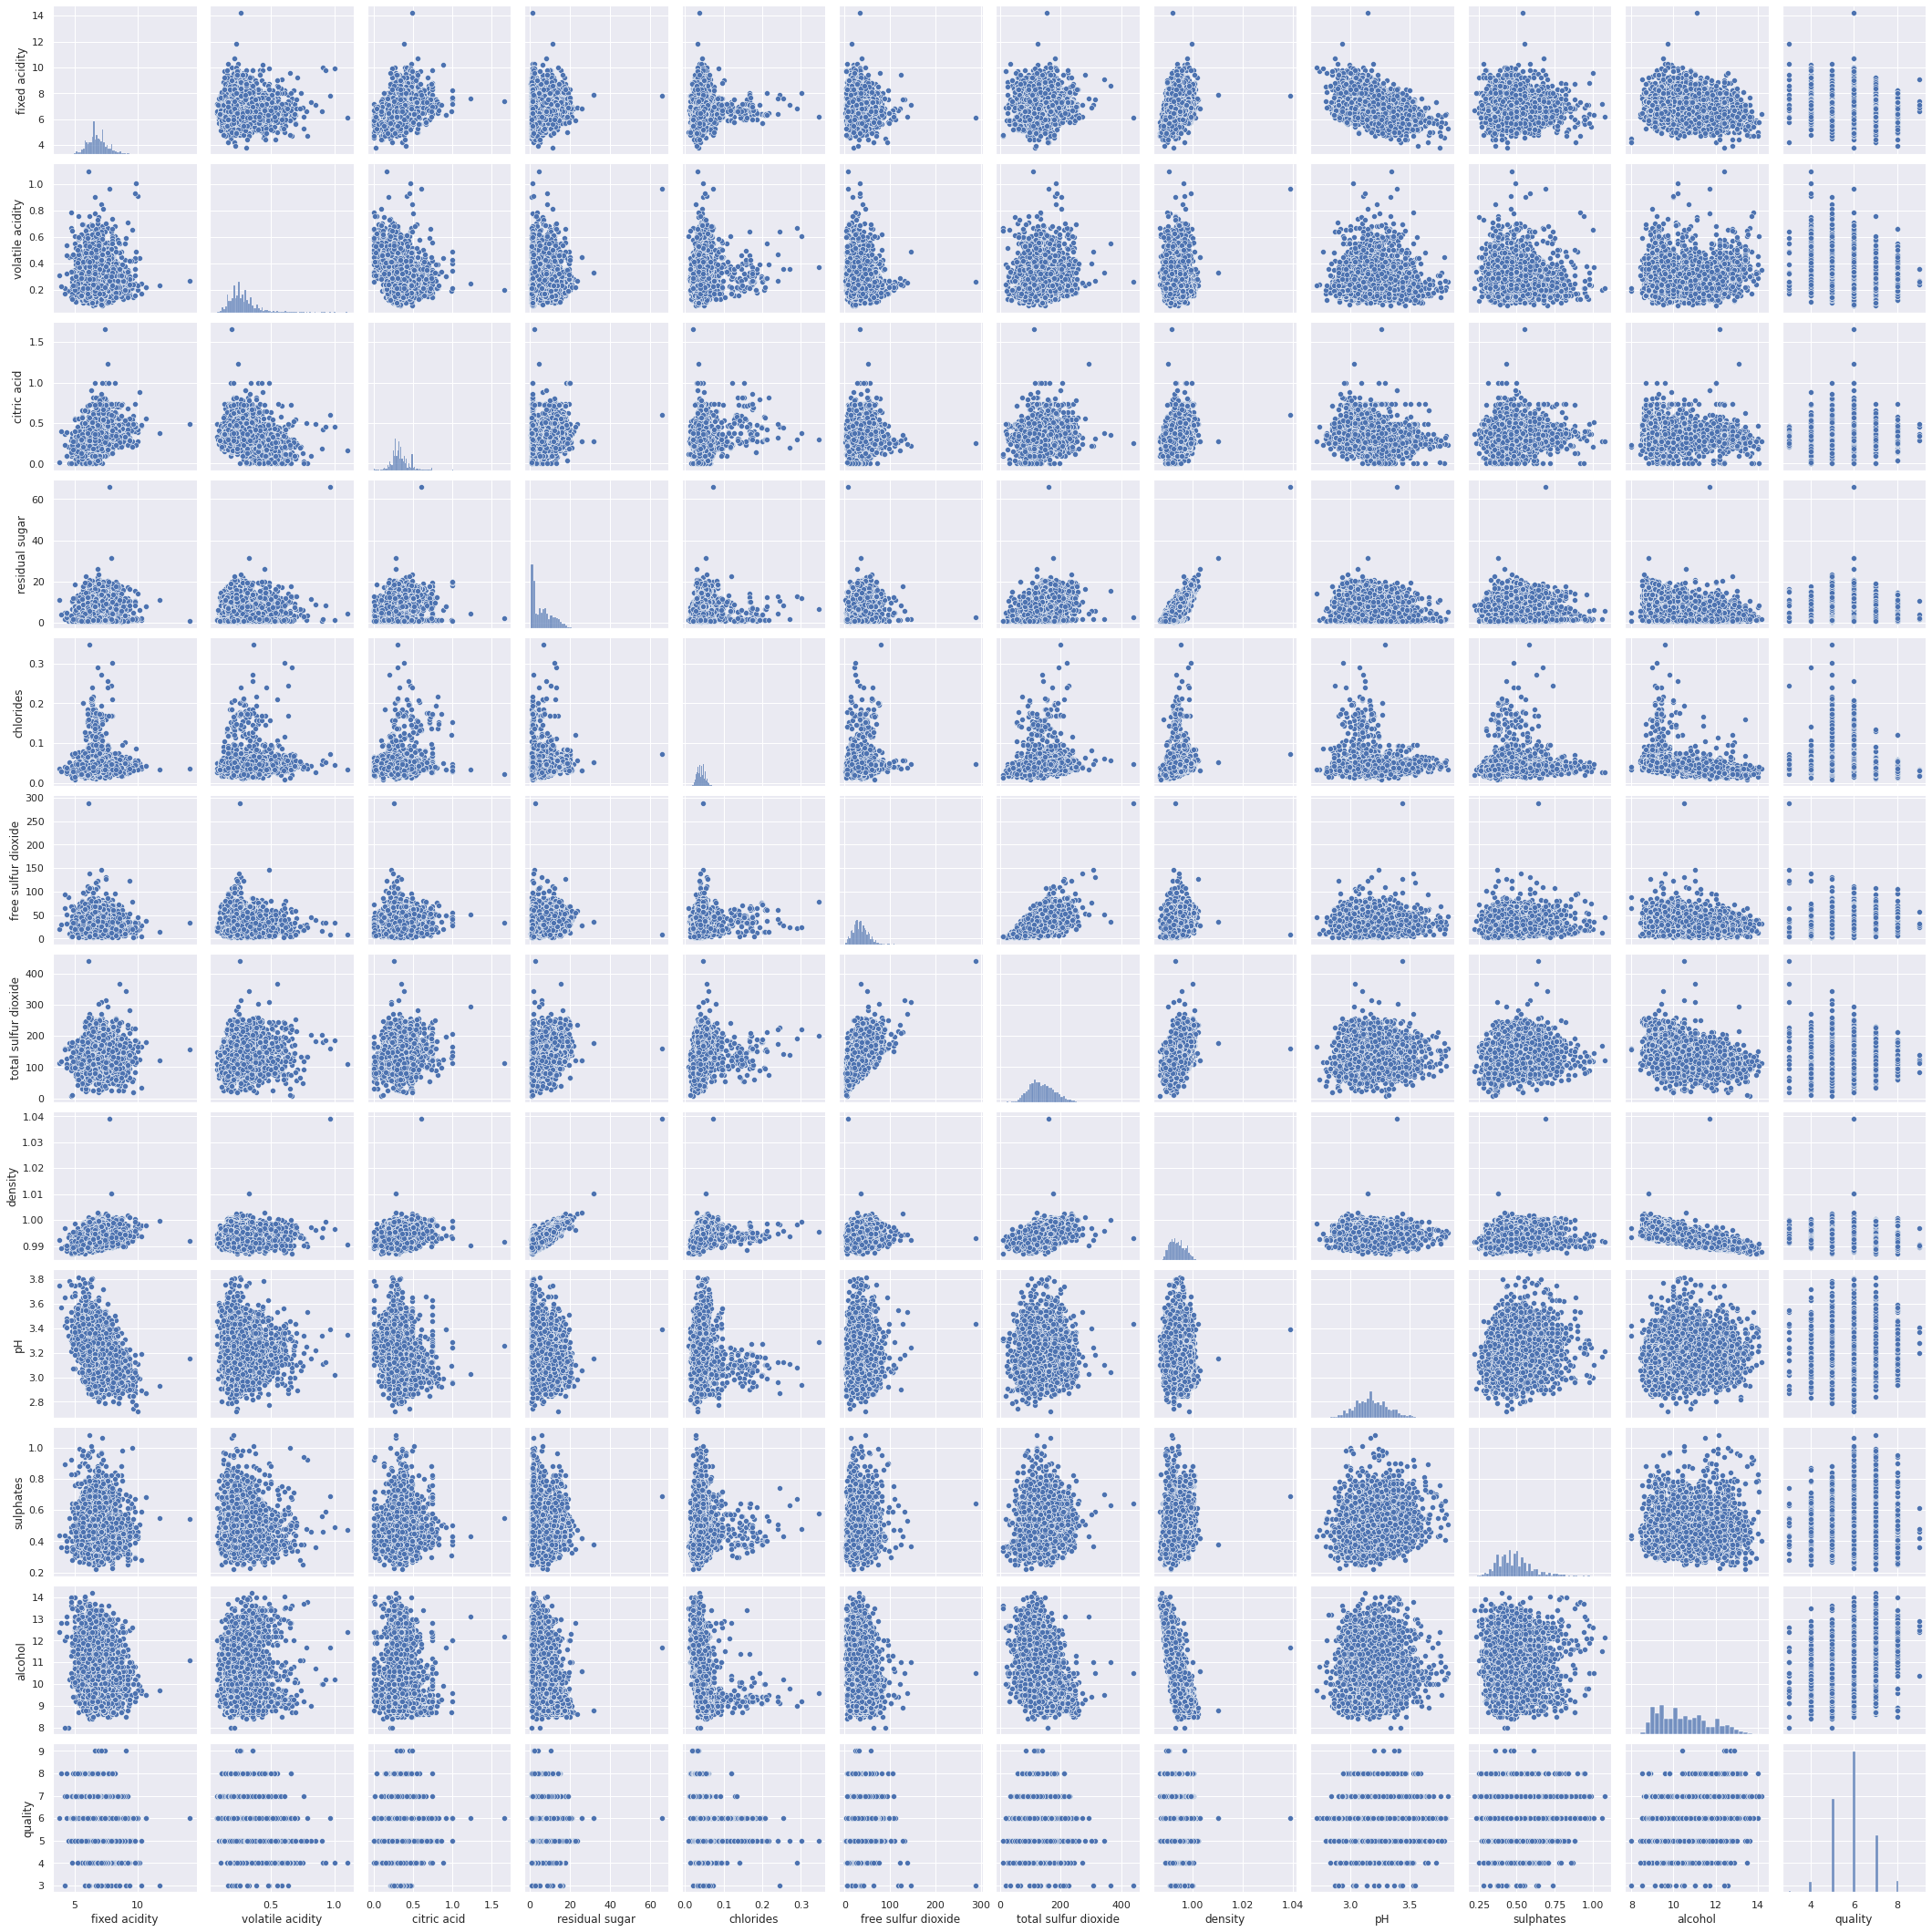

In [20]:
#Stats desc graphiques
sns.pairplot(data)
''' 
Nous devons partir sur une étude de corrélation plus approfondie sur quelques variables
Les distributions semblent normales à l'oeil (sauf residual sugar..), ce qui nous suffira pour ce TP
'''

" \nSeulement une corrélation forte entre le sucre résiduel et l'alcool (0,84) nous décidons de laisser tout de même la colonne. \n"

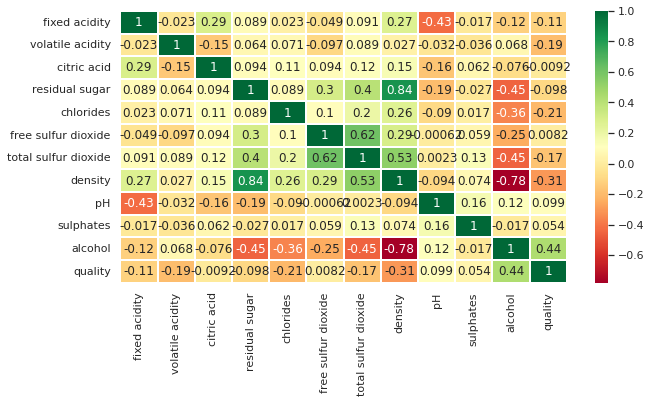

In [32]:
#Etude des corrélations
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

''' 
Seulement deux corrélation forte entre 
- le sucre résiduel et la densite (0,84) 
- l'alcool (attention target) et la densité (-0.78)
nous décidons de laisser tout de même les colonnes. 
'''

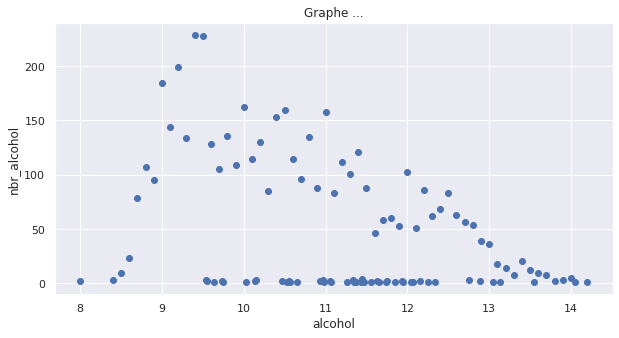

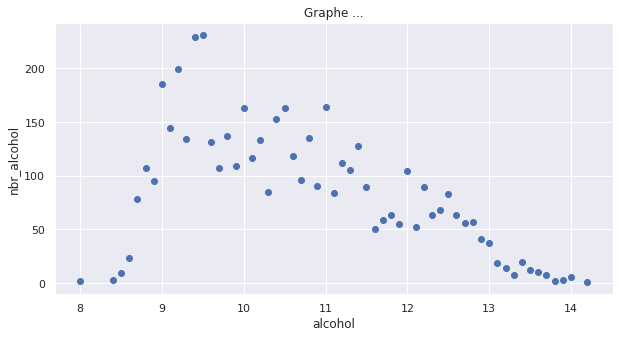

In [22]:
#Travail particulier sur notre variable cible
fig = plt.figure()
ax = fig.add_subplot()
x= data["alcohol"].value_counts().index
y= data["alcohol"].value_counts().values
ax.scatter(x,y)

ax.set_xlabel("alcohol")
ax.set_ylabel("nbr_alcohol")
ax.set_title("Graphe ...")
plt.show()

''' 
Il y a une problème de chiffres SIGNIFICATIFS sur les mesures ici. Ma proposition est de le traiter
Vous pourriez décider de ne pas le faire, mais je suis un peu dubitatif ne connaissant pas comment a été fait ce dataset, 
donc je limite les biais potentiels
'''

df= data.copy()
df["alcohol"] = df["alcohol"].round(1)

fig = plt.figure()
ax = fig.add_subplot()
X= df["alcohol"].value_counts().index
y= df["alcohol"].value_counts().values
ax.scatter(X,y)

ax.set_xlabel("alcohol")
ax.set_ylabel("nbr_alcohol")
ax.set_title("Graphe ...")
plt.show()

Nous passons maintenant à l'étape de split

In [23]:
#Le split 
X = df.drop(['alcohol', 'quality'], axis=1)
y = df['alcohol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

(3428, 10)

Puis de normalisation

In [ ]:
#La normalisation
'''
Nous utilisons le standard Scaler de sklearn, qui évite de faire le travail sur chque colonne manuellement.
ATTENTION : bien regarder la doc et la formule appliquée
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
'''


# Instancier l'objet StandardScaler
scaler = StandardScaler()
# Calcul des paramètres
scaler.fit(X_train)
# Transformer les données
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Afficher les données normalisées
#print(X_train_scaled)

'''
Nous pouvons ici faire le travail sur la target aussi, mais pas nécessaire
'''

Et enfin à notre modélisation !

In [25]:
# Créer le modèle de régression linéaire 
model = LinearRegression().fit(X_train_scaled, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Évaluer la performance du modèle
score = model.score(X_test_scaled, y_test)
accuracy = r2_score(y_test, y_pred)
print(f"Le coefficient de détermination R² du modèle est : {score:.2f}")
print(f"L'accuracy  du modèle est : {accuracy:.2f}")
mean_squared_error(y_test, y_pred)
print(f"La racine carrée de l'erreur quadratique moyenne est : {mean_squared_error(y_test, y_pred):.2f}")

Le coefficient de détermination R² du modèle est : 0.90
L'accuracy  du modèle est : 0.90
La racine carrée de l'erreur quadratique moyenne est : 0.15


" \nOn voit ici que notre modèle n'est pas mauvais d'après le r2, mais le tracé n'est pas bon\n"

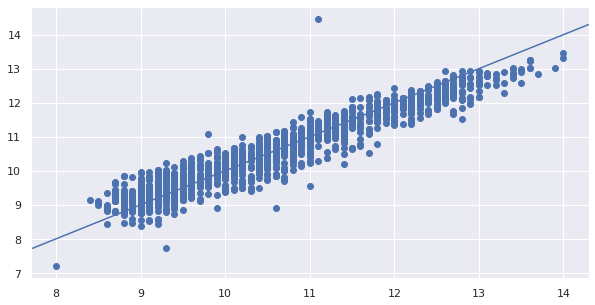

In [47]:
#Vision graphique de notre résultat

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.axline((8, 8), slope=1)

''' 
On voit ici que notre modèle n'est pas mauvais d'après le r2, mais le tracé n'est pas si bon sur les valeurs minimales/maximales)
la MAE et la MAPE vont-elle confirmer ou infirmer ?
'''


In [48]:
#propositon d'Aghiles pour la MAPE

import numpy as np

# Collecter les données d'observation et de prédiction
observed = y_test
predicted = y_pred

# Calculer l'erreur absolue
absolute_errors = np.abs(observed - predicted)

# Calculer le pourcentage d'erreur absolue
percentage_errors = absolute_errors / observed * 100
####print ("L'erreur en pourcentage :\n",percentage_errors)
# Calculer la MAPE
mape = np.mean(percentage_errors)

print("La MAPE est :", mape)


La MAPE est : 2.8492759245097417
